In [ ]:
!jupyter nbconvert --to script featurize_data.ipynb
!jupyter nbconvert --to script train_register_model.ipynb
!jupyter nbconvert --to script evaluate_models.ipynb

In [ ]:
%run -i 'featurize_data.py' 1
%run -i 'train_register_model.py' 1
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 2
%run -i 'train_register_model.py' 2
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 3
%run -i 'train_register_model.py' 3
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 4
%run -i 'train_register_model.py' 4
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 5
%run -i 'train_register_model.py' 5
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 6
%run -i 'train_register_model.py' 6
%run -i 'evaluate_models.py'

In [ ]:
%run -i 'featurize_data.py' 7
%run -i 'train_register_model.py' 7
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 8
%run -i 'train_register_model.py' 8
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 9
%run -i 'train_register_model.py' 9
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 10
%run -i 'train_register_model.py' 10
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 11
%run -i 'train_register_model.py' 11
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 12
%run -i 'train_register_model.py' 12
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 13
%run -i 'train_register_model.py' 13
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 14
%run -i 'train_register_model.py' 14
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 15
%run -i 'train_register_model.py' 15
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 16
%run -i 'train_register_model.py' 16
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 17
%run -i 'train_register_model.py' 17
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 18
%run -i 'train_register_model.py' 18
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 19
%run -i 'train_register_model.py' 19
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 20
%run -i 'train_register_model.py' 20
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 21
%run -i 'train_register_model.py' 21
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 22
%run -i 'train_register_model.py' 22
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 23
%run -i 'train_register_model.py' 23
%run -i 'evaluate_models.py'

%run -i 'featurize_data.py' 24
%run -i 'train_register_model.py' 24
%run -i 'evaluate_models.py'

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

from azureml.core import Workspace, Model

In [3]:
ws = Workspace.from_config()

In [4]:
model    = ws.models['MVP7model']
versions = model.version

In [5]:
df = pd.read_csv('report.csv')

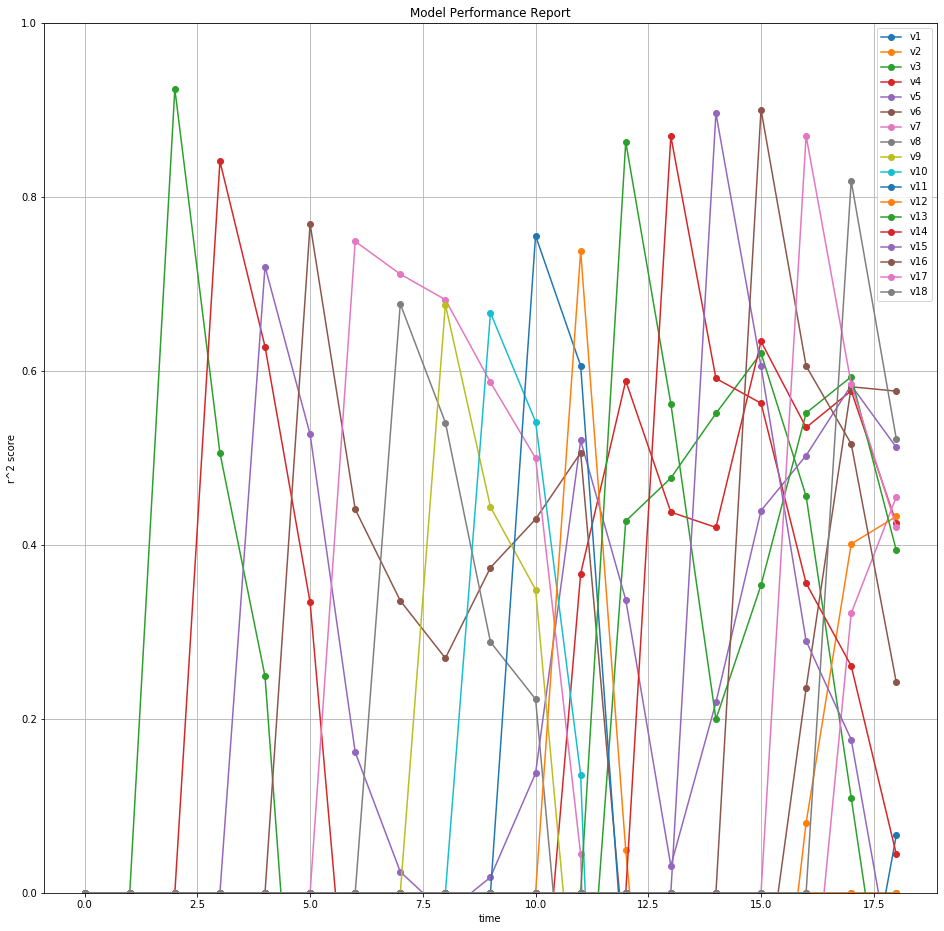

In [16]:
fig = plt.figure(figsize=(16, 16))

for version in range(1, versions): 
    name = 'v{}'.format(version)
    plt.plot(df[name], '-o', label=name)
    
plt.legend()
plt.grid()
plt.title('Model Performance Report')
plt.xlabel('time')
plt.ylabel('r^2 score')

plt.ylim([0, 1])
#plt.xlim([0, 10])

plt.show()

In [ ]:
from azureml.core                    import Workspace, Experiment

from azureml.core.runconfig          import RunConfiguration
from azureml.core.conda_dependencies import CondaDependencies

from azureml.widgets                 import RunDetails

from azureml.pipeline.core           import Pipeline
from azureml.pipeline.steps          import PythonScriptStep

In [ ]:
ws     = Workspace.from_config()
dstore = ws.get_default_datastore()

In [ ]:
ct     = ws.compute_targets['cpu-cluster']

In [ ]:
def run_pipeline(delta=0):

    src    = '.'

    run_config = RunConfiguration()
    run_config.environment.docker.enabled = True
    run_config.environment.python.conda_dependencies  = CondaDependencies.create(conda_packages=[], pip_packages=['azureml-opendatasets'])

    step1  = PythonScriptStep(name='featurize_data',       script_name='featurize_data.py',       arguments=[delta], runconfig=run_config, compute_target=ct, source_directory=src, allow_reuse=True)
    step2  = PythonScriptStep(name='train_register_model', script_name='train_register_model.py', arguments=[delta], runconfig=run_config, compute_target=ct, source_directory=src, allow_reuse=True)
    step3  = PythonScriptStep(name='evaluate_models',      script_name='evaluate_models.py',      arguments=[delta], runconfig=run_config, compute_target=ct, source_directory=src, allow_reuse=True)

    step2.run_after(step1)
    step3.run_after(step2)

    steps  = [step1, step2, step3]

    pipeline = Pipeline(workspace=ws, steps=steps)
    run      = Experiment(ws, 'retrainMVP2').submit(pipeline)

In [ ]:
for delta in range(10):
    run_pipeline(delta=delta)

In [ ]:
run      = Experiment(ws, 'real_exp_0').submit(pipeline)

In [ ]:
pipeline.publish() 